```
```
# ANÁLISE EXPLORATÓRIA (alvo: churn)

### Leitura dos dados

In [378]:
import pandas as pd

In [379]:
df = pd.read_csv('/content/dados_tratados.csv')

In [380]:
df.head()

,churn,sexo,65+,parceiro,dependentes,meses_de_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,faturamento_sem_papel,metodo_pagamento,gasto_mensal,gasto_total,gasto_diario
0,No,Female,False,True,True,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,No,Male,False,True,True,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,True,Mailed check,59.9,542.40,1.996667
2,Yes,Male,False,True,True,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,Yes,Male,True,True,True,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,True,True,True,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


### Informações gerais do DF

In [381]:
print("Informações gerais do DataFrame:")
df.info()

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churn                  7043 non-null   object 
 1   sexo                   7043 non-null   object 
 2   65+                    7043 non-null   bool   
 3   parceiro               7043 non-null   bool   
 4   dependentes            7043 non-null   bool   
 5   meses_de_contrato      7043 non-null   int64  
 6   servico_telefone       7043 non-null   object 
 7   multiplas_linhas       7043 non-null   object 
 8   servico_internet       7043 non-null   object 
 9   seguranca_online       7043 non-null   object 
 10  backup_online          7043 non-null   object 
 11  protecao_dispositivo   7043 non-null   object 
 12  suporte_tecnico        7043 non-null   object 
 13  streaming_tv           7043 non-null   object 
 14  streaming_filmes       

### Estatísticas descritivas

In [382]:
print("Estatísticas descritivas:")
print(df.describe(include='all'))

Estatísticas descritivas:
       churn  sexo    65+ parceiro dependentes  meses_de_contrato  \
count   7043  7043   7043     7043        7043        7043.000000   
unique     2     2      2        1           1                NaN   
top       No  Male  False     True        True                NaN   
freq    5174  3555   5901     7043        7043                NaN   
mean     NaN   NaN    NaN      NaN         NaN          32.371149   
std      NaN   NaN    NaN      NaN         NaN          24.559481   
min      NaN   NaN    NaN      NaN         NaN           0.000000   
25%      NaN   NaN    NaN      NaN         NaN           9.000000   
50%      NaN   NaN    NaN      NaN         NaN          29.000000   
75%      NaN   NaN    NaN      NaN         NaN          55.000000   
max      NaN   NaN    NaN      NaN         NaN          72.000000   

       servico_telefone multiplas_linhas servico_internet seguranca_online  \
count              7043             7043             7043          

### Análise de balanceamento = DESBALANCEADO

In [383]:
churn_percentages = df['churn'].value_counts(normalize=True) * 100
print("Percentual de churn:")
print(churn_percentages)

Percentual de churn:
churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


### Análise gráfica das variáveis categóricas x churn

In [384]:
import plotly.express as px

colunas_categoricas = df.select_dtypes(include=['object', 'bool']).columns

for col in colunas_categoricas:
    fig = px.histogram(df, x=col, color='churn', barmode='group', color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(title=f'Distribuição de {col} por Churn')
    fig.show()

### Análise gráfica das variáveis numéricas x churn

In [385]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for col in colunas_numericas:
    fig = px.box(df, y=col, color='churn', color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_layout(title=f'Box Plot de {col} por Churn')
    fig.show()

```
```
# ENCODING E NORMALIZAÇÃO

In [386]:
# Separação da coluna alvo do restante dos dados.

y = df['churn']
X = df.drop('churn', axis=1)

In [387]:
# Encoding da variável alvo com LabelEncoder.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [388]:
# Transformação das colunas categóricas e numéricas em lista para fazer encoding com One-Hot Encoding.

colunas_categoricas = X.select_dtypes(include=['object', 'bool']).columns.tolist()
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Colunas Categóricas:")
print(colunas_categoricas)
print("\nColunas Numéricas:")
print(colunas_numericas)

Colunas Categóricas:
['sexo', '65+', 'parceiro', 'dependentes', 'servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'faturamento_sem_papel', 'metodo_pagamento']

Colunas Numéricas:
['meses_de_contrato', 'gasto_mensal', 'gasto_total', 'gasto_diario']


In [389]:
# Encoding das variáveis categóricas.

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
X_encoded_categoricas = ohe.fit_transform(X[colunas_categoricas])

X_encoded_categoricas

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [390]:
# Normalização das variáveis numéricas

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numericas_normalizadas = scaler.fit_transform(X[colunas_numericas])

X_numericas_normalizadas

array([[-0.95168167,  0.02786194, -0.74549017,  0.02786194],
       [-0.95168167, -0.16158292, -0.76796149, -0.16158292],
       [-1.15528349,  0.30372024, -0.88343052,  0.30372024],
       ...,
       [-1.23672422, -0.48064794, -0.96647286, -0.48064794],
       [ 1.41009942,  0.1026428 ,  1.03559364,  0.1026428 ],
       [ 1.24721797, -0.19149526,  0.6294102 , -0.19149526]])

In [391]:
# Concatenação dos dados processados.

import numpy as np

y = y.reshape(-1, 1) # Ajuste de dimensão do

X_normalizado = np.concatenate((X_numericas_normalizadas, X_encoded_categoricas, y), axis=1)

X_normalizado

array([[-0.95168167,  0.02786194, -0.74549017, ...,  0.        ,
         1.        ,  0.        ],
       [-0.95168167, -0.16158292, -0.76796149, ...,  0.        ,
         1.        ,  0.        ],
       [-1.15528349,  0.30372024, -0.88343052, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.23672422, -0.48064794, -0.96647286, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41009942,  0.1026428 ,  1.03559364, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24721797, -0.19149526,  0.6294102 , ...,  1.        ,
         0.        ,  0.        ]])

In [392]:
X = X_normalizado
X_normalizado

array([[-0.95168167,  0.02786194, -0.74549017, ...,  0.        ,
         1.        ,  0.        ],
       [-0.95168167, -0.16158292, -0.76796149, ...,  0.        ,
         1.        ,  0.        ],
       [-1.15528349,  0.30372024, -0.88343052, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.23672422, -0.48064794, -0.96647286, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41009942,  0.1026428 ,  1.03559364, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24721797, -0.19149526,  0.6294102 , ...,  1.        ,
         0.        ,  0.        ]])

In [393]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [394]:
# Criando nomes para as colunas do DataFrame combinado e obtendo os nomes das novas features após o One-Hot Encoding.

encoded_feature_names = ohe.get_feature_names_out(colunas_categoricas)

In [395]:
# Combinando os nomes das features numéricas e das categóricas encoded.

all_feature_names = colunas_numericas + list(encoded_feature_names) + ['churn']

In [396]:
# Criando o DataFrame final para a modelagem.

df_modelagem = pd.DataFrame(X_normalizado, columns=all_feature_names)


In [397]:
df_modelagem.rename(columns={'meses_de_contrato': 'tipo_contrato_Mensal'}, inplace=True)

In [398]:
display(df_modelagem.head())

,tipo_contrato_Mensal,gasto_mensal,gasto_total,gasto_diario,sexo_Male,65+_True,servico_telefone_Yes,multiplas_linhas_No phone service,multiplas_linhas_Yes,servico_internet_Fiber optic,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_filmes_No internet service,streaming_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check,churn
0,-0.951682,0.027862,-0.745490,0.027862,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.951682,-0.161583,-0.767961,-0.161583,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.155283,0.303720,-0.883431,0.303720,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.788800,1.104706,-0.460934,1.104706,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.196004,0.636080,-0.889368,0.636080,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [399]:
# Exportar o DataFrame de modelagem para um arquivo CSV.

df_modelagem.to_csv('df_modelagem.csv', index=False)

print("DataFrame 'df_modelagem' exportado para 'df_modelagem.csv'")

DataFrame 'df_modelagem' exportado para 'df_modelagem.csv'


# ANÁLISE DE CORRELAÇÃO

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

In [401]:
# Calculando a matriz de correlação no DataFrame de modelagem (que contém apenas tipos numéricos)
correlation_matrix = df_modelagem.corr()

# Isolarndo a correlação de todas as variáveis com a variável 'churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

print("Correlação das variáveis com 'churn' (em ordem decrescente):")
print(churn_correlation)

Correlação das variáveis com 'churn' (em ordem decrescente):
churn                                       1.000000
servico_internet_Fiber optic                0.308020
metodo_pagamento_Electronic check           0.301919
gasto_diario                                0.193356
gasto_mensal                                0.193356
65+_True                                    0.150889
streaming_tv_Yes                            0.063228
streaming_filmes_Yes                        0.061382
multiplas_linhas_Yes                        0.040102
servico_telefone_Yes                        0.011942
sexo_Male                                  -0.008612
multiplas_linhas_No phone service          -0.011942
protecao_dispositivo_Yes                   -0.066160
backup_online_Yes                          -0.082255
metodo_pagamento_Mailed check              -0.091683
metodo_pagamento_Credit card (automatic)   -0.134302
suporte_tecnico_Yes                        -0.164674
seguranca_online_Yes                  


Um heatmap de correlação foi salvo como 'correlation_heatmap.png'


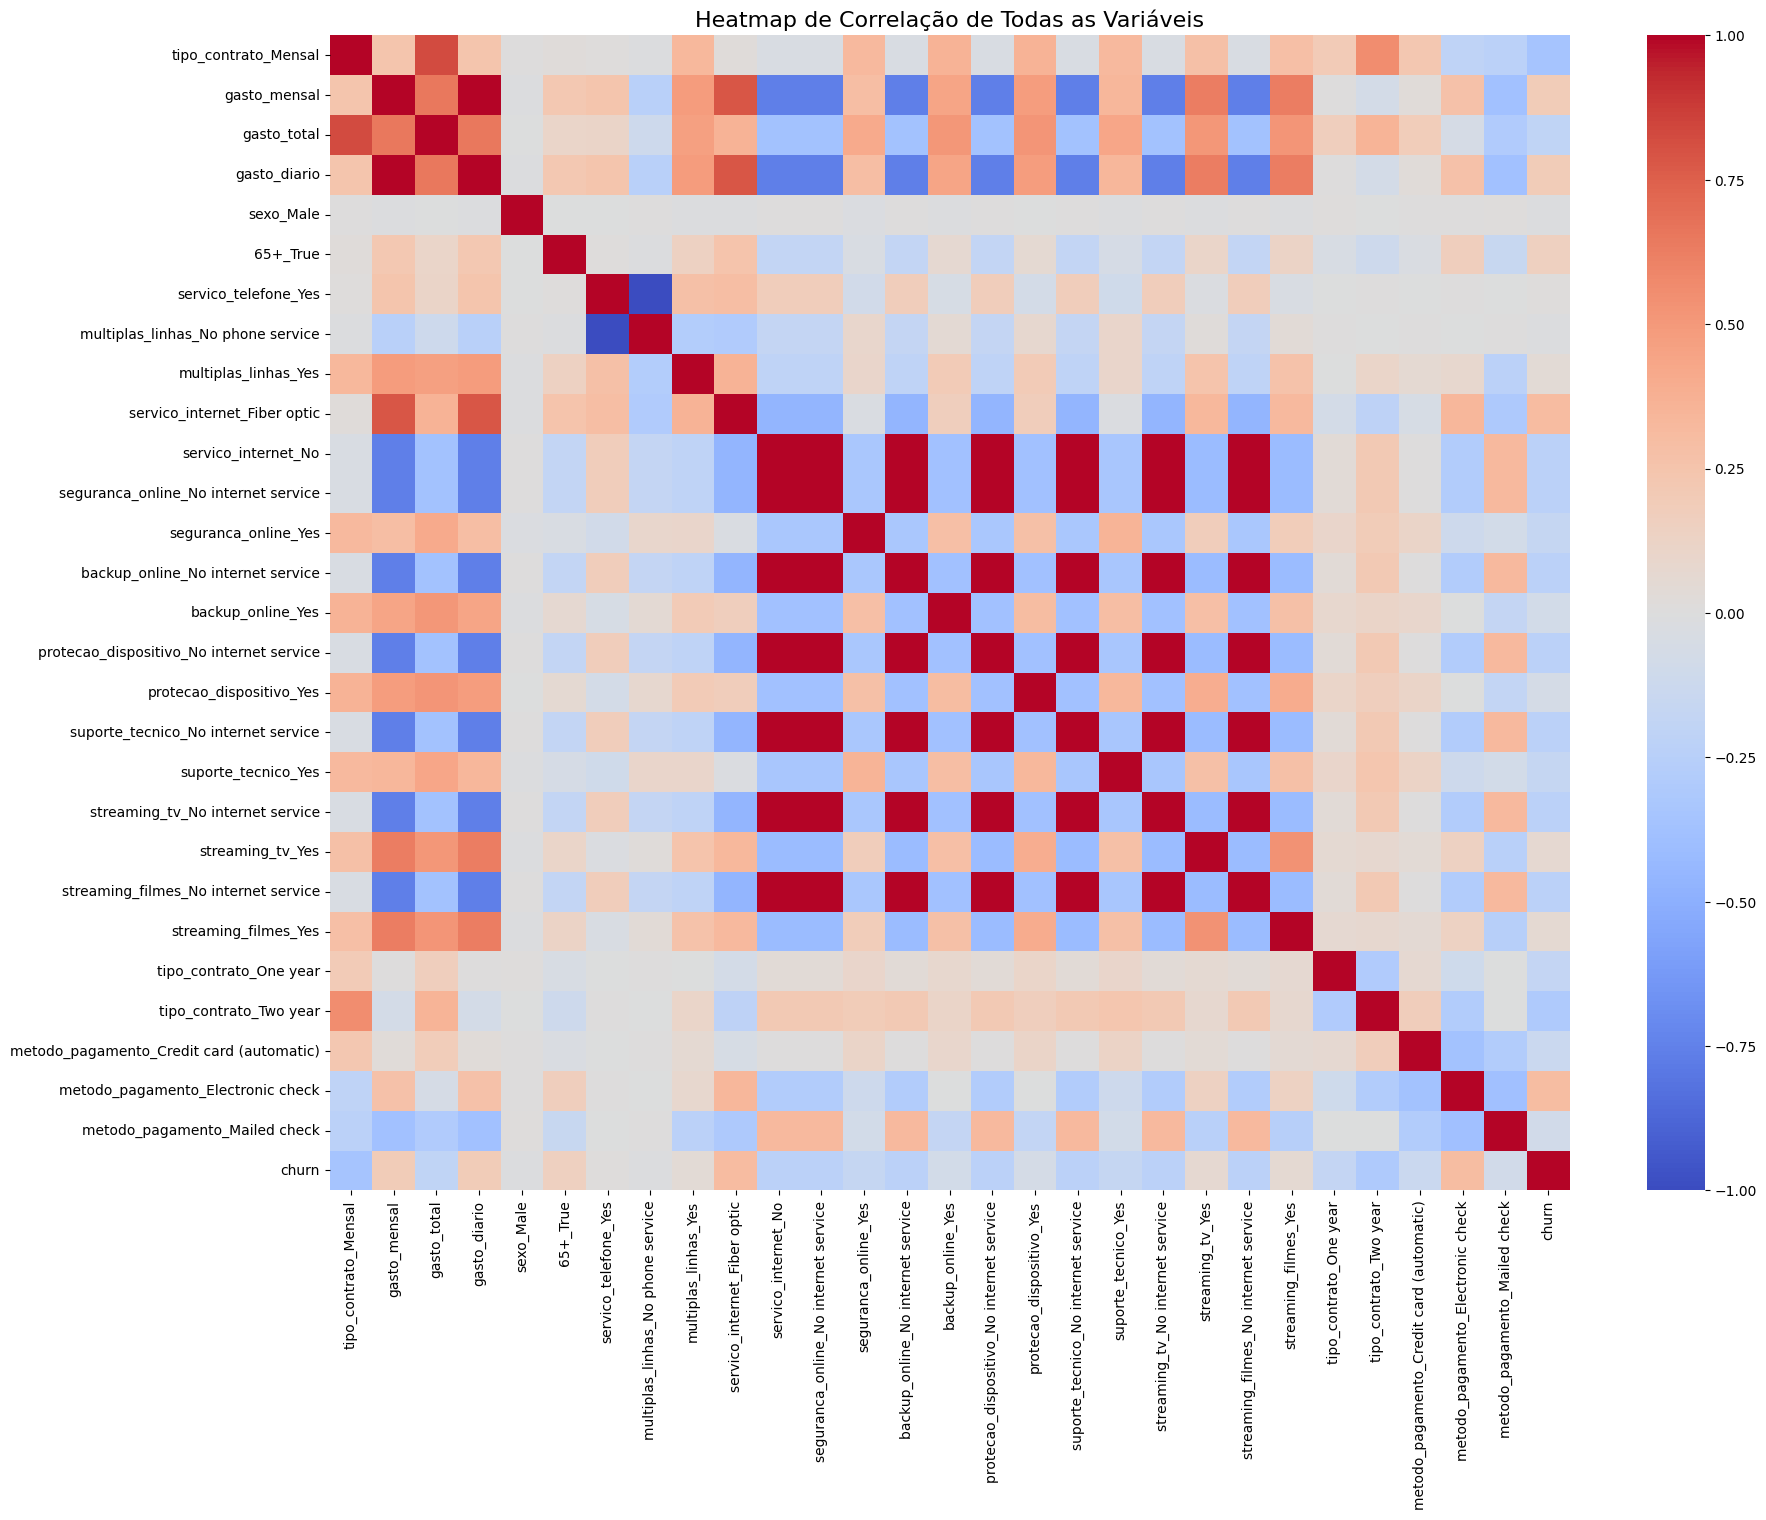

In [402]:
# Heatmap para visualizar a matriz de correlação inteira
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap de Correlação de Todas as Variáveis', fontsize=16)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

print("\nUm heatmap de correlação foi salvo como 'correlation_heatmap.png'")

Fatores que AUMENTAM a chance de churn (Correlação Positiva):

* Tipo de Contrato Mensal
* Internet Fibra Óptica
* Pagamento com Cheque Eletrônico
* Gasto Mensal

Fatores que DIMINUEM a chance de churn (Correlação Negativa):

* Meses de Contrato
* Tipo de Contrato de Dois Anos
* Gasto Total

# DIVIDINDO OS DADOS

In [403]:
# Separando as features (X) da variável alvo (y).

X = df_modelagem.drop('churn', axis=1)
y = df_modelagem['churn']

In [404]:
%pip install imblearn

In [405]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, random_state = 42)

print("Dados divididos em:")
print(f"Treino: {X.shape[0]} amostras ({X.shape[0]/X.shape[0]:.2%})")
print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/X.shape[0]:.2%})")

Dados divididos em:
Treino: 5986 amostras (100.00%)
Teste: 1057 amostras (17.66%)


Balanceamento com Over Sampling SMOTE

In [406]:
from sklearn.dummy import DummyClassifier

In [407]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)

In [408]:
print("Shape original de X:", X.shape)
print("Shape de X balanceado:", X_balanced.shape)
print("\nContagem de valores original de y:")
print(y.value_counts())
print("\nContagem de valores de y balanceado:")
print(y_balanced.value_counts())

Shape original de X: (5986, 28)
Shape de X balanceado: (6594, 28)

Contagem de valores original de y:
churn
0.0    4397
1.0    1589
Name: count, dtype: int64

Contagem de valores de y balanceado:
churn
0.0    3297
1.0    3297
Name: count, dtype: int64


In [409]:
print("Contagem de valores da variável alvo de treino balanceada (y_train_balanced):")
print(y_train_balanced.value_counts())

Contagem de valores da variável alvo de treino balanceada (y_train_balanced):
churn
0.0    1720
1.0    1720
Name: count, dtype: int64


# MODELO DUMMY COMO BASELINE

In [410]:
# Treinando o modelo Dummy.

dummy = DummyClassifier(random_state=42)
dummy.fit(X_train_balanced, y_train_balanced)

DummyClassifier(random_state=42)

In [411]:
# Fazendo previsões nos dois conjuntos.

y_pred_dummy_test = dummy.predict(X_test)
y_pred_dummy_val = dummy.predict(X_val)

In [412]:
# Avaliando o modelo no conjunto validação.

print("\nResultados do modelo Dummy no conjunto validação:")
print(f"Acurácia: {accuracy_score(y_val, y_pred_dummy_val):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_val, y_pred_dummy_val, target_names=['Não Churn', 'Churn'], zero_division=0))


Resultados do modelo Dummy no conjunto validação:
Acurácia: 0.7348
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.73      1.00      0.85      1100
       Churn       0.00      0.00      0.00       397

    accuracy                           0.73      1497
   macro avg       0.37      0.50      0.42      1497
weighted avg       0.54      0.73      0.62      1497



In [413]:
# Avaliando o modelo no conjunto teste.

print("\nResultados do modelo Dummy no conjunto teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dummy_test):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_dummy_test, target_names=['Não Churn', 'Churn'], zero_division=0))


Resultados do modelo Dummy no conjunto teste:
Acurácia: 0.7351
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.74      1.00      0.85       777
       Churn       0.00      0.00      0.00       280

    accuracy                           0.74      1057
   macro avg       0.37      0.50      0.42      1057
weighted avg       0.54      0.74      0.62      1057



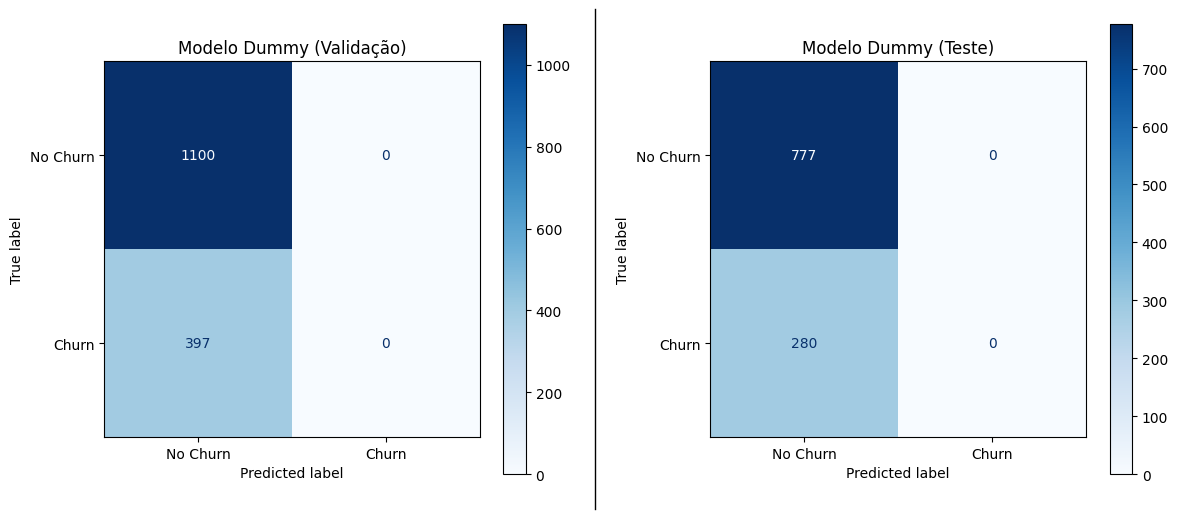

In [414]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrizes de confusão dos conjuntos de validação e teste.

y_pred_dummy_test = dummy.predict(X_test)
matriz_confusao_dummy_val = confusion_matrix(y_val, y_pred_dummy_val)
matriz_confusao_dummy_test = confusion_matrix(y_test, y_pred_dummy_test)

# Figura com dois subplots (1 linha, 2 colunas).
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotando a matriz de confusão do modelo Dummy no conjunto de validação no primeiro subplot.
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_dummy_val, display_labels=['No Churn', 'Churn']).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Modelo Dummy (Validação)')

# Plotando a matriz de confusão do modelo Dummy no conjunto de teste no segundo subplot.
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_dummy_test, display_labels=['No Churn', 'Churn']).plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Dummy (Teste)')

plt.tight_layout(w_pad=3.0)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', lw=1, transform=fig.transFigure))
plt.show()

A matriz de confusão do conjunto de validação mostra que o modelo Dummy prevê apenas a classe mais frequente falhando completamente em identificar a classe minoritária (Churn).

# MODELO DE REGRESSÃO LOGÍSTICA

In [415]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [416]:
# Treinando o modelo Regressão Logística.

modelo_log_reg = LogisticRegression(max_iter=1000, random_state=42)
modelo_log_reg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [417]:
# Fazendo previsões nos dois conjuntos.

y_pred_log_reg_val = modelo_log_reg.predict(X_val)
y_pred_log_reg = log_reg.predict(X_test)

In [418]:
# Avaliando o modelo no conjunto de validação.

print("\nResultados da Regressão Logística no conjunto de validação:")
print(f"Acurácia: {accuracy_score(y_val, y_pred_log_reg_val):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_val, y_pred_log_reg_val, target_names=['Não Churn', 'Churn'], zero_division=0))


Resultados da Regressão Logística no conjunto de validação:
Acurácia: 0.7515
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.90      0.74      0.81      1100
       Churn       0.52      0.78      0.62       397

    accuracy                           0.75      1497
   macro avg       0.71      0.76      0.72      1497
weighted avg       0.80      0.75      0.76      1497



In [419]:
# Avaliando o modelo no conjunto de teste.

print("\nResultados do modelo Regressão Logística no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Churn', 'Churn']))


Resultados do modelo Regressão Logística no conjunto de teste:
Acurácia: 0.7938
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.84      0.89      0.86       777
       Churn       0.64      0.52      0.57       280

    accuracy                           0.79      1057
   macro avg       0.74      0.71      0.72      1057
weighted avg       0.78      0.79      0.79      1057



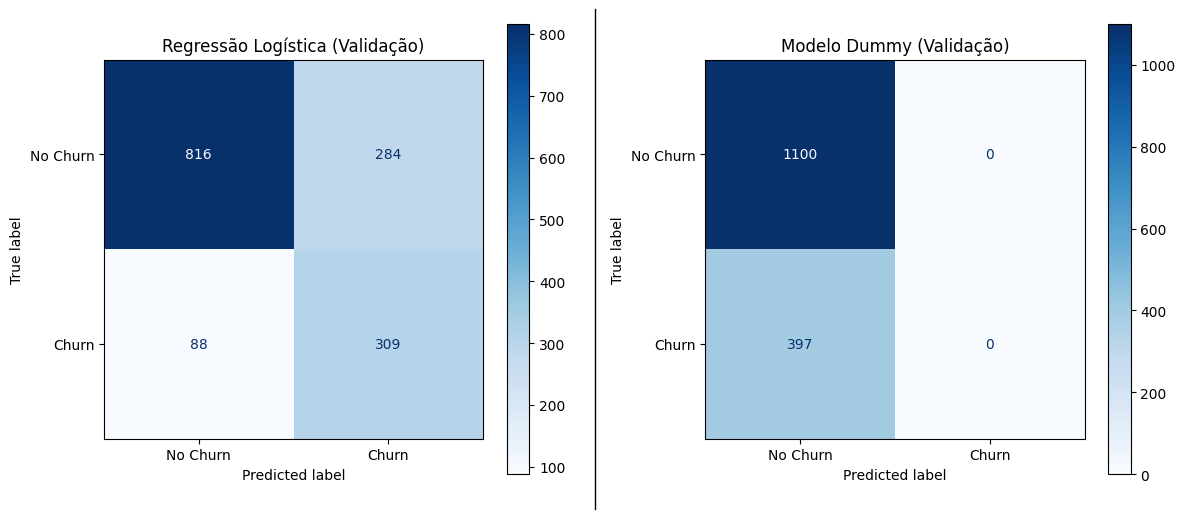

In [420]:
y_pred_log_reg_val = modelo_log_reg.predict(X_val)
y_pred_dummy_val = dummy.predict(X_val)

# Comparação entre matrizes Regressão Logística x Dummy
matriz_confusao_log_reg_val = confusion_matrix(y_val, y_pred_log_reg_val)
matriz_confusao_dummy_val = confusion_matrix(y_val, y_pred_dummy_val)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão da Regressão Logística no primeiro subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_log_reg_val, display_labels=['No Churn', 'Churn']).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Regressão Logística (Validação)')

# Matriz de confusão do modelo Dummy no segundo subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_dummy_val, display_labels=['No Churn', 'Churn']).plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Dummy (Validação)')

plt.tight_layout(w_pad=3.0)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', lw=1, transform=fig.transFigure))
plt.show()

*   **Verdadeiros Negativos (425):** O modelo previu corretamente que 425 clientes *não* dariam churn e eles realmente não deram.
*   **Falsos Positivos (149):** O modelo previu incorretamente que 149 clientes dariam churn, mas eles na verdade *não* deram.
*   **Falsos Negativos (30):** O modelo previu incorretamente que 30 clientes *não* dariam churn, mas eles na verdade *deram* churn.
*   **Verdadeiros Positivos (177):** O modelo previu corretamente que 177 clientes dariam churn e eles realmente deram.

**Comparação com o Modelo Dummy:**

Ao contrário do modelo Dummy (que teve VP=0 e FN=207 para a classe Churn na validação), o modelo de Regressão Logística conseguiu identificar corretamente 177 clientes que deram churn (Verdadeiros Positivos). Embora ainda tenha Falsos Positivos (previu churn onde não houve) e Falsos Negativos (não previu churn onde houve), este modelo é muito mais útil para identificar a classe minoritária de interesse (Churn) do que o baseline Dummy. As métricas de Precisão, Recall e F1-score para a classe 'Churn' no relatório de classificação da Regressão Logística confirmam essa melhora.

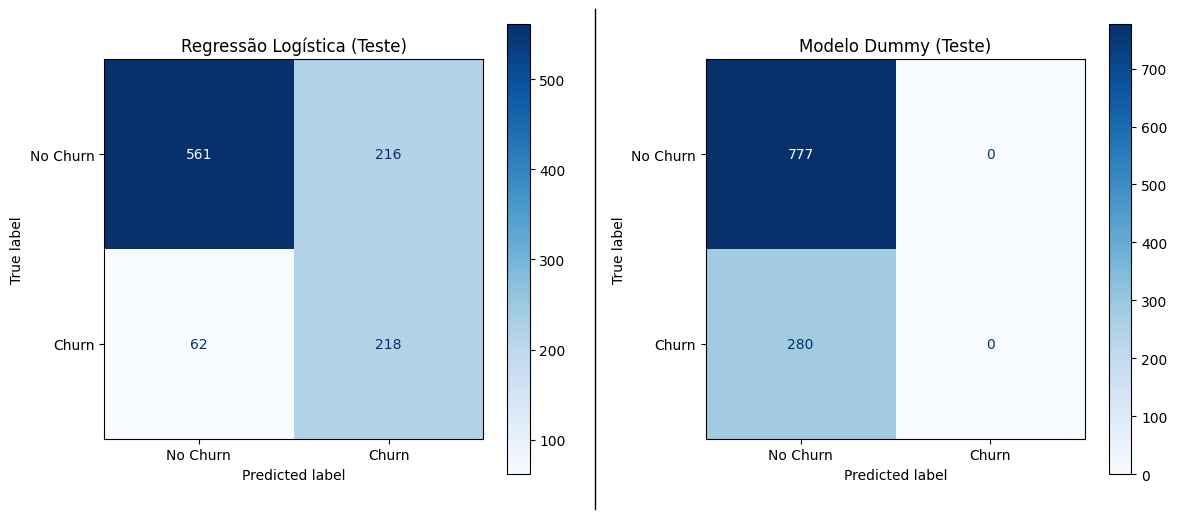

In [421]:
y_pred_log_reg_test = modelo_log_reg.predict(X_test)
y_pred_dummy_test = dummy.predict(X_test)

# Comparação entre matrizes Regressão Logística x Dummy
matriz_confusao_log_reg_test = confusion_matrix(y_test, y_pred_log_reg_test)
matriz_confusao_dummy_tes = confusion_matrix(y_test, y_pred_dummy_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão da Regressão Logística no primeiro subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_log_reg_test, display_labels=['No Churn', 'Churn']).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Regressão Logística (Teste)')

# Matriz de confusão do modelo Dummy no segundo subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_dummy_test, display_labels=['No Churn', 'Churn']).plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Dummy (Teste)')

plt.tight_layout(w_pad=3.0)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', lw=1, transform=fig.transFigure))
plt.show()

*   **Verdadeiros Negativos (TN = 296):** O modelo previu corretamente que 296 clientes *não* dariam churn.
*   **Falsos Positivos (FP = 109):** O modelo previu incorretamente que 109 clientes dariam churn (eram "Não Churn", mas o modelo previu "Churn").
*   **Falsos Negativos (FN = 33):** O modelo previu incorretamente que 33 clientes *não* dariam churn (eram "Churn", mas o modelo previu "Não Churn").
*   **Verdadeiros Positivos (TP = 114):** O modelo previu corretamente que 114 clientes dariam churn.

O modelo de regressão logística demonstra uma capacidade muito superior de identificar clientes que dão churn, com 114 Verdadeiros Positivos no conjunto de teste. Embora tenha Falsos Positivos (109) e Falsos Negativos (33), ela é significativamente melhor do que o baseline Dummy na tarefa de prever churn. As métricas no relatório de classificação da Regressão Logística confirmam que, apesar de ter mais Falsos Positivos do que Falsos Negativos para a classe Churn, ela consegue prever uma porção razoável dos casos de churn (Recall de 0.49) com uma precisão aceitável (Precisão de 0.61), resultando em um F1-score de 0.54 para a classe Churn.

# MODELO RANDOM FOREST

In [422]:
from sklearn.ensemble import RandomForestClassifier

In [423]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [424]:
# Fazendo previsões nos dois conjuntos.

y_pred_rf_val = random_forest.predict(X_val)
y_pred_rf = random_forest.predict(X_test)

In [425]:
# Avaliando o modelo no conjunto de validação.

print("\nResultados do Random Forest no conjunto de validação:")
print(f"Acurácia: {accuracy_score(y_val, y_pred_rf_val):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_val, y_pred_rf_val, target_names=['Não Churn', 'Churn'], zero_division=0))


Resultados do Random Forest no conjunto de validação:
Acurácia: 0.8270
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.88      0.89      0.88      1100
       Churn       0.68      0.65      0.67       397

    accuracy                           0.83      1497
   macro avg       0.78      0.77      0.77      1497
weighted avg       0.82      0.83      0.83      1497



In [426]:
# Avaliando o modelo no conjunto de teste.

print("\nResultados do Random Forest no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn'], zero_division=0))


Resultados do Random Forest no conjunto de teste:
Acurácia: 0.7588
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.84      0.83      0.83       777
       Churn       0.54      0.57      0.55       280

    accuracy                           0.76      1057
   macro avg       0.69      0.70      0.69      1057
weighted avg       0.76      0.76      0.76      1057



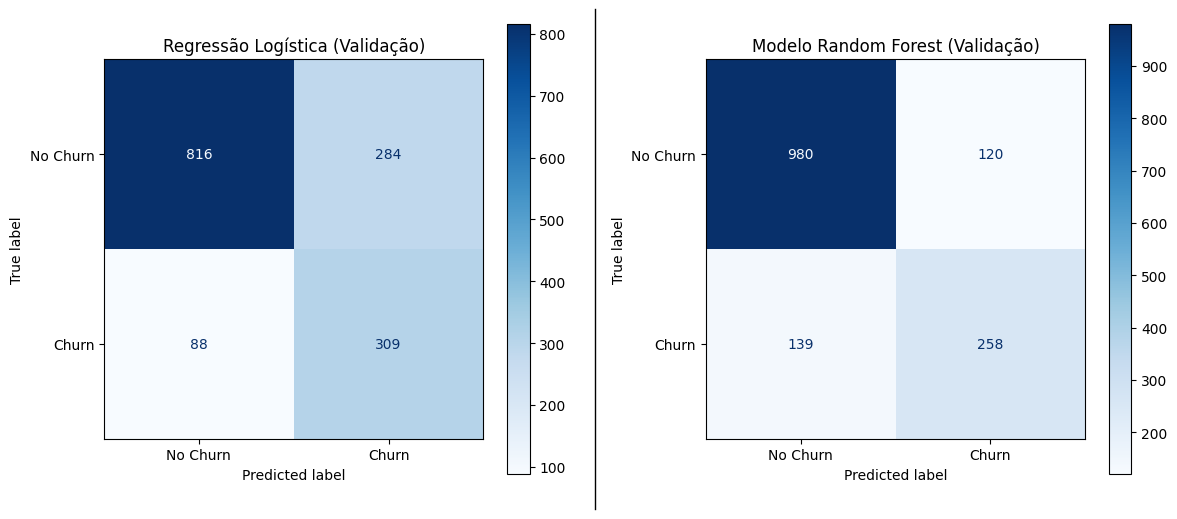

In [433]:
y_rf_val = random_forest.predict(X_test)

# Comparação entre matrizes Regressão Logística x Dummy.
matriz_confusao_log_reg_val = confusion_matrix(y_val, y_pred_log_reg_val)
matriz_confusao_rf_val = confusion_matrix(y_val, y_pred_rf_val)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão da Regressão Logística no primeiro subplot.
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_log_reg_val, display_labels=['No Churn', 'Churn']).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Regressão Logística (Validação)')

# Matriz de confusão do modelo Random Forest no segundo subplot.
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf_val, display_labels=['No Churn', 'Churn']).plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Random Forest (Validação)')

plt.tight_layout(w_pad=3.0)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', lw=1, transform=fig.transFigure))
plt.show()

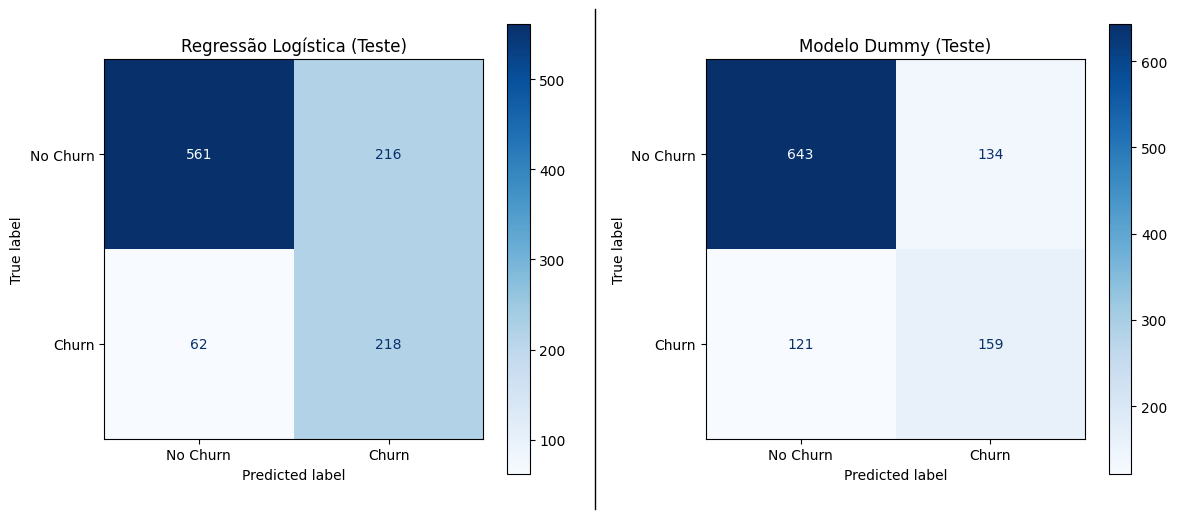

In [431]:
y_rf_test = random_forest.predict(X_test)

# Comparação entre matrizes Regressão Logística x Dummy
matriz_confusao_log_reg_test = confusion_matrix(y_test, y_pred_log_reg_test)
matriz_confusao_rf_test = confusion_matrix(y_test, y_rf_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusão da Regressão Logística no primeiro subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_log_reg_test, display_labels=['No Churn', 'Churn']).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Regressão Logística (Teste)')

# Matriz de confusão do modelo Dummy no segundo subplot
ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf_test, display_labels=['No Churn', 'Churn']).plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Modelo Dummy (Teste)')

plt.tight_layout(w_pad=3.0)
fig.add_artist(plt.Line2D([0.5, 0.5], [0, 1], color='black', lw=1, transform=fig.transFigure))
plt.show()



**Regressão Logística (Resultados no Teste):**

*   **Acurácia:** 0.7938
*   **Relatório de Classificação:**
    *   Não Churn: Precision 0.84, Recall 0.89, F1-score 0.86
    *   Churn: Precision 0.64, Recall 0.52, F1-score 0.57
*   **Matriz de Confusão:**
    *   Verdadeiros Positivos (identificou Churn corretamente): ~218
    *   Falsos Positivos (previu Churn, mas era Não Churn): ~216
    *   Falsos Negativos (previu Não Churn, mas era Churn): ~62
    *   Verdadeiros Negativos (identificou Não Churn corretamente): ~561

**Random Forest (Resultados no Teste - Célula `1GqCzLn1v-R8` e `DVaoj8tvFJ98`):**

*   **Acurácia:** 0.7588
*   **Relatório de Classificação:**
    *   Não Churn: Precision 0.84, Recall 0.83, F1-score 0.83
    *   Churn: Precision 0.54, Recall 0.57, F1-score 0.55
*   **Matriz de Confusão:**
    *   Verdadeiros Positivos (identificou Churn corretamente): ~159
    *   Falsos Positivos (previu Churn, mas era Não Churn): ~134
    *   Falsos Negativos (previu Não Churn, mas era Churn): ~121
    *   Verdadeiros Negativos (identificou Não Churn corretamente): ~643

**Análise Comparativa:**

*   **Acurácia:** A Regressão Logística apresentou uma acurácia ligeiramente maior (0.7938 vs 0.7588).
*   **Previsão de Churn (Classe 1):**
    *   **Precisão:** A Regressão Logística teve uma precisão maior para a classe Churn (0.64 vs 0.54). Isso significa que, das vezes que a Regressão Logística previu churn, uma proporção maior estava correta em comparação com o Random Forest. A Regressão Logística comete menos Falsos Positivos (109 vs 134).
    *   **Recall:** O Random Forest teve um recall ligeiramente maior para a classe Churn (0.57 vs 0.52). Isso indica que o Random Forest conseguiu identificar uma proporção um pouco maior dos clientes que *realmente* deram churn em comparação com a Regressão Logística. A Regressão Logística comete menos Falsos Negativos (62 vs 121).
    *   **F1-score:** O F1-score para a classe Churn é similar entre os dois modelos (0.57 vs 0.55), com uma pequena vantagem para a Regressão Logística.
*   **Previsão de Não Churn (Classe 0):** Ambos os modelos tiveram um desempenho muito bom na previsão da classe majoritária, com métricas elevadas. A Regressão Logística teve um recall ligeiramente maior (0.89 vs 0.83), enquanto o Random Forest teve uma precisão ligeiramente maior (0.84 vs 0.84 - valores arredondados).

**Conclusão:**

Ambos os modelos são significativamente melhores que o modelo Dummy baseline na previsão de churn. Ao comparar Random Forest e Regressão Logística no conjunto de teste:

*   A **Regressão Logística** parece ser ligeiramente melhor em termos de **Precisão** para a classe Churn (menos Falsos Positivos), o que pode ser importante se o custo de abordar um cliente que não daria churn for alto.
*   O **Random Forest** é um pouco melhor em termos de **Recall** para a classe Churn (identifica mais casos reais de Churn), o que pode ser preferível se o custo de perder um cliente for muito alto.

# MODELO DE REGRESSÃO LOGÍSTICA COM BALANCEAMENTO DE PESO

In [434]:
# Modelo Regressão Logística com Balanceamento de Peso

log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [435]:
# Fazendo as previsões

y_pred_log_reg = log_reg_balanced.predict(X_test)

In [436]:
# Avaliando o modelo

print("\nRelatório de Classificação da Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Churn', 'Churn']))


Relatório de Classificação da Regressão Logística:
              precision    recall  f1-score   support

   Não Churn       0.90      0.73      0.80       777
       Churn       0.50      0.76      0.61       280

    accuracy                           0.74      1057
   macro avg       0.70      0.75      0.70      1057
weighted avg       0.79      0.74      0.75      1057



# MODELO RANDOM FOREST COM BALANCEAMENTO DE PESO

In [440]:
# Modelo Random Forest com Balanceamento de Peso

random_forest_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [441]:
# Fazendo as previsões

y_pred_rf = random_forest_balanced.predict(X_test)

In [442]:
# Avaliando o modelo

print("\nRelatório de Classificação do Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn']))


Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

   Não Churn       0.83      0.89      0.86       777
       Churn       0.62      0.48      0.54       280

    accuracy                           0.78      1057
   macro avg       0.72      0.69      0.70      1057
weighted avg       0.77      0.78      0.77      1057



# MÉTRICAS DE TODOS OS MODELOS NOS CONJUNTOS DE TESTE

In [454]:
print("\nResultados do modelo Regressão Logística no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Churn', 'Churn'], zero_division=0))

print("-" *55)

print("\nResultados do Random Forest no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn'], zero_division=0))

print("-" *55)

print("\nResultados do modelo Regressão Logística com balanceamento de peso:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Churn', 'Churn']))

print("-" *55)

print("\nResultados do modelo Random Forest com balanceamento de peso:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn']))


Resultados do modelo Regressão Logística no conjunto de teste:
Acurácia: 0.7360
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.90      0.73      0.80       777
       Churn       0.50      0.76      0.61       280

    accuracy                           0.74      1057
   macro avg       0.70      0.75      0.70      1057
weighted avg       0.79      0.74      0.75      1057

-------------------------------------------------------

Resultados do Random Forest no conjunto de teste:
Acurácia: 0.7833
Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.83      0.89      0.86       777
       Churn       0.62      0.48      0.54       280

    accuracy                           0.78      1057
   macro avg       0.72      0.69      0.70      1057
weighted avg       0.77      0.78      0.77      1057

-------------------------------------------------------

Resultados do modelo Regress

# OTIMIZANDO O RANDOM FOREST

In [455]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [457]:
rf_otimizado = RandomForestClassifier(random_state=42, class_weight='balanced')

In [458]:
param_grid_rf = {
    'n_estimators': [100, 200],         # Número de árvores
    'max_depth': [10, 20, None],       # Profundidade máxima
    'min_samples_leaf': [1, 2],        # Mínimo de amostras por folha
    'criterion': ['gini', 'entropy']     # Critério de divisão
}

In [465]:
# Configurando o GridSearchCV para focar em 'recall'

grid_search_rf = GridSearchCV(
    estimator=rf_otimizado,
    param_grid=param_grid_rf,
    scoring='recall',  # Foco a ser  melhorado
    cv=5,              # Validação cruzada com 5 folds
    verbose=2,         # Mostra o progresso do treinamento
    n_jobs=-1          # Usa todos os processadores disponíveis
)

# Buscando pelos melhores parâmetros

grid_search_rf.fit(X_train, y_train)
print(f"\nMelhores parâmetros encontrados: {grid_search_rf.best_params_}")
print(f"Melhor score de recall (na validação cruzada): {grid_search_rf.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Melhores parâmetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
Melhor score de recall (na validação cruzada): 0.7130


In [466]:
# Avaliação do melhor modelo encontrado no conjunto de teste

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

print("\n--- Relatório de Classificação do Random Forest Otimizado ---")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Não Churn', 'Churn']))


--- Relatório de Classificação do Random Forest Otimizado ---
              precision    recall  f1-score   support

   Não Churn       0.88      0.80      0.83       777
       Churn       0.55      0.69      0.61       280

    accuracy                           0.77      1057
   macro avg       0.71      0.74      0.72      1057
weighted avg       0.79      0.77      0.78      1057



In [467]:
from sklearn.pipeline import Pipeline
import pickle

In [469]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identificar colunas numéricas e categóricas (excluindo o alvo)
# Usamos as listas colunas_numericas e colunas_categoricas criadas anteriormente
numerical_features = colunas_numericas
categorical_features = colunas_categoricas

# Criar o ColumnTransformer para aplicar transformações diferentes a diferentes tipos de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Manter outras colunas (se houver, embora neste caso não haja)
)

# Criar o pipeline combinando o pré-processamento e o modelo otimizado
# Usei o best_rf_model encontrado no GridSearchCV
pipeline_rf_otimizado = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', best_rf_model)])


In [474]:
# Recarregando os dados originais
df_original = pd.read_csv('/content/dados_tratados.csv')

# Separando a variável alvo e as features no dataframe original
y_original = df_original['churn']
X_original = df_original.drop('churn', axis=1)

# Fazendo a mesma divisão treino/teste/validação usada anteriormente para garantir a consistência
X_train_original, X_temp_original, y_train_original, y_temp_original = train_test_split(X_original, y_original, test_size=0.30, random_state=42, stratify=y_original)
X_val_original, X_test_original, y_val_original, y_test_original = train_test_split(X_temp_original, y_temp_original, test_size=0.50, random_state=42, stratify=y_temp_original)

# Treinando o pipeline corrigido usando os dados de treino originais
pipeline_rf_otimizado.fit(X_train_original, y_train_original)

print("Pipeline treinado com sucesso nos dados originais.")

# Salvando o pipeline treinado em um arquivo pickle
filename = 'modelo_random_forest_otimizado.pkl'
with open(filename, 'wb') as f:
    pickle.dump(pipeline_rf_otimizado, f)

print(f"Pipeline salvo em '{filename}'")

Pipeline treinado com sucesso nos dados originais.
Pipeline salvo em 'modelo_random_forest_otimizado.pkl'
